In [1]:
from strands import Rectangle, Schrodinger2D
import numpy as np
import matplotlib.pyplot as plt

ugent_blauw = "#1e64c8"
r, g, b = np.array([30, 100, 200])/255

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap("ugent_blauw", {
    'red': [(0, r, r), (1, r, r)],
    'green': [(0, g, g), (1, g, g)],
    'blue': [(0, b, b), (1, b, b)]
})

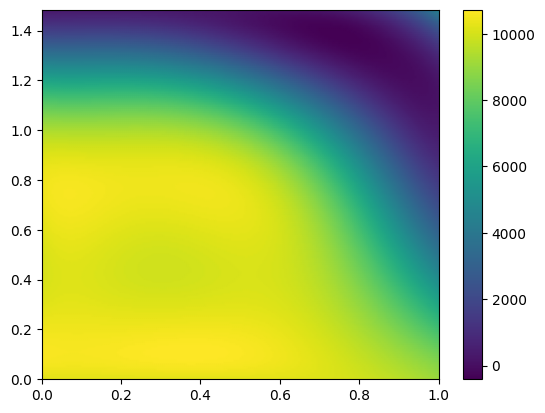

In [37]:
from PIL import Image
import numpy as np
from scipy.interpolate import RegularGridInterpolator
img = Image.open("potential.png").convert('L')
ratio = img.size[0]/img.size[1]
img = img.resize((6, 6))

data = np.array(img.getdata(), dtype="float64")
data.resize((img.size[1], img.size[0]))

xs = np.linspace(0, 1, data.shape[0])
ys = np.linspace(0, ratio, data.shape[1])

interpolator = RegularGridInterpolator((xs, ys), data, method="quintic")

def V(x, y):
    return 40 * interpolator((x, y))


xmin, xmax = xs[0], xs[-1]
ymin, ymax = ys[0], ys[-1]

xs = np.linspace(xmin, xmax, 200)
ys = np.linspace(ymin, ymax, 200)
X, Y = np.meshgrid(xs, ys)

Z = V(X, Y)

plt.pcolormesh(X, Y, Z, shading="gouraud")
plt.colorbar()

In [45]:
n = 61
s = Schrodinger2D(V, Rectangle(xmin,xmax, ymin,ymax), gridSize=(n, n), maxBasisSize=31)
eigenfunctions = s.eigenfunctions(20)

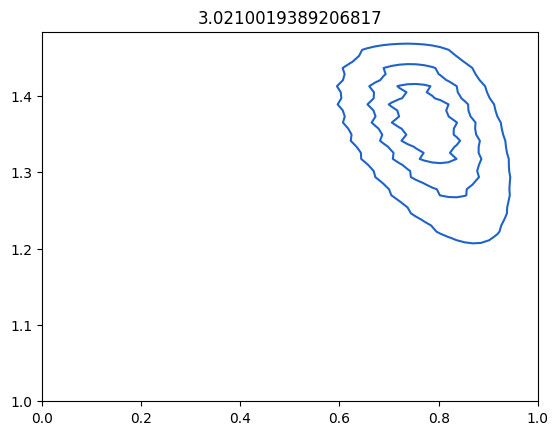

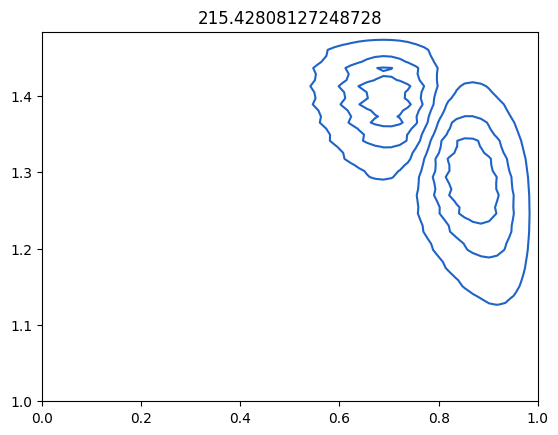

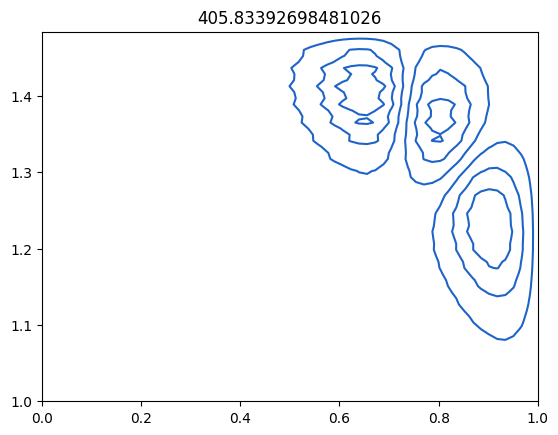

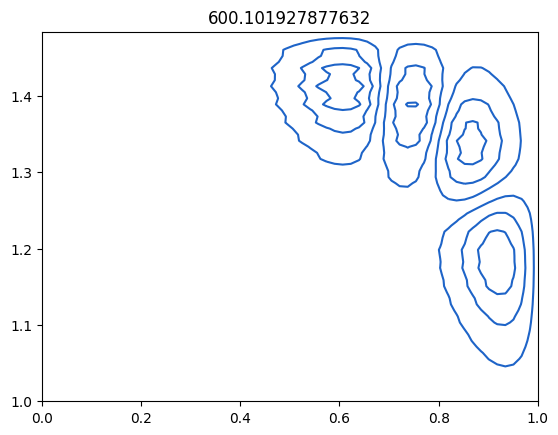

In [ ]:
xs = np.linspace(0, 1, n+1)
ys = np.linspace(1, ymax, n+1)
X, Y = np.meshgrid(xs, ys)

for E, f in eigenfunctions:
    Z = f(X, Y)
    m = np.max(np.abs(Z))
    levels = np.linspace(-m, m, 8)
    plt.contour(X, Y, Z, levels=levels, cmap=cmap)
    plt.title(E)
    # plt.axis("equal")
    plt.show()
    

In [11]:
Z

array([[0.96026596, 0.96124534, 0.96220012, ..., 0.68595965, 0.68240621,
        0.67883522],
       [0.96124534, 0.96222505, 0.96318014, ..., 0.68684596, 0.68329129,
        0.67971906],
       [0.96220012, 0.96318014, 0.96413554, ..., 0.68771002, 0.68415414,
        0.68058071],
       ...,
       [0.68595965, 0.68684596, 0.68771002, ..., 0.43823908, 0.43503734,
        0.43181999],
       [0.68240621, 0.68329129, 0.68415414, ..., 0.43503734, 0.43184024,
        0.42862757],
       [0.67883522, 0.67971906, 0.68058071, ..., 0.43181999, 0.42862757,
        0.42541959]])